In [4]:
import numpy as np
dataset_filename = "affinity_dataset.txt"
X= np.loadtxt(dataset_filename)




In [11]:
n_samples, n_features = X.shape
checkkk = X.shape

print('No of samples {0} and no of features {1}'.format(n_samples, n_features))

print(X[:5])
print(type(X))
print(X.shape)

No of samples 100 and no of features 5
[[0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]]
<class 'numpy.ndarray'>
(100, 5)


In [12]:
# The names of the features, .
features = ["bread", "milk", "cheese", "apples", "bananas"]
print(type(features))

# computing the Support and Confidence of the rule "If a person buys Apples, they also buy Bananas".

# First, how many rows contain the premise: that a person is buying apples
num_apple_purchases = 0
for sample in X:
    if sample[3] == 1:  # This person bought Apples
        num_apple_purchases += 1
print("{0} people bought Apples".format(num_apple_purchases))

# How many of the cases that a person bought Apples involved the people purchasing Bananas too?
# Record both cases where the rule is valid and is invalid.
rule_valid = 0
rule_invalid = 0
for sample in X:
    if sample[3] == 1:  # This person bought Apples
        if sample[4] == 1:
            # This person bought both Apples and Bananas
            rule_valid += 1
        else:
            # This person bought Apples, but not Bananas
            rule_invalid += 1
print("{0} cases of the rule being valid were discovered".format(rule_valid))
print("{0} cases of the rule being invalid were discovered".format(rule_invalid))

# compute Support and Confidence
support = rule_valid  # The Support is the number of times the rule is discovered.
confidence = rule_valid / num_apple_purchases
print("The support is {0} and the confidence is {1:.3f}.".format(support, confidence))
# Confidence can be thought of as a percentage using the following:
print("As a percentage, that is {0:.1f}%.".format(100 * confidence))

<class 'list'>
43 people bought Apples
27 cases of the rule being valid were discovered
16 cases of the rule being invalid were discovered
The support is 27 and the confidence is 0.628.
As a percentage, that is 62.8%.


In [14]:
#Finding Rule : If a person buys product X, then they are likely to purchase product Y.

#Step 1 - Derive Support and Confidence

from collections import defaultdict
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

for sample in X:
    for premise in range(n_features):
        if sample[premise] == 1:
            num_occurences[premise] += 1
            for conclusion in range(n_features):
                if premise != conclusion:
                        if sample[conclusion] == 1 :
                            valid_rules[(premise,conclusion)] += 1
                        else:
                            invalid_rules[(premise,conclusion)] += 1
                           

                      
support = valid_rules
confidence = defaultdict(float)

# The names of the features,
features = ["bread", "milk", "cheese", "apples", "bananas"]

for premise, conclusion in valid_rules.keys():
    confidence[(premise,conclusion)] = valid_rules[(premise,conclusion)] / num_occurences[premise]
    
def print_rule(premise, conclusion, support, confidence, features):
        print("Rule: If a person buys {0} they will also buy {1}".format(features[premise], features[conclusion]))
        print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
        print(" - Support: {0}".format(support[(premise, conclusion)]))
        print("")       


for premise, conclusion in confidence:
    print_rule(premise,conclusion,support,confidence,features) 
      


defaultdict(<class 'int'>, {(0, 1): 13, (1, 0): 13, (2, 4): 20, (4, 2): 20, (2, 3): 22, (3, 2): 22, (3, 4): 27, (4, 3): 27, (1, 3): 18, (3, 1): 18, (1, 4): 27, (4, 1): 27, (0, 2): 5, (2, 0): 5, (0, 4): 16, (4, 0): 16, (1, 2): 11, (2, 1): 11, (0, 3): 9, (3, 0): 9})
Rule: If a person buys bread they will also buy milk
 - Confidence: 0.464
 - Support: 13

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.250
 - Support: 13

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.351
 - Support: 20

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.512
 - Support: 22

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Suppor

In [4]:
# Sort by support
from pprint import pprint
pprint(list(support.items()))

[((0, 1), 13),
 ((1, 0), 13),
 ((2, 4), 20),
 ((4, 2), 20),
 ((2, 3), 22),
 ((3, 2), 22),
 ((3, 4), 27),
 ((4, 3), 27),
 ((1, 3), 18),
 ((3, 1), 18),
 ((1, 4), 27),
 ((4, 1), 27),
 ((0, 2), 5),
 ((2, 0), 5),
 ((0, 4), 16),
 ((4, 0), 16),
 ((1, 2), 11),
 ((2, 1), 11),
 ((0, 3), 9),
 ((3, 0), 9)]


In [20]:
from operator import itemgetter
#Sort by Support and theb by confidence
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)
sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)
print(sorted_confidence)

[((3, 4), 0.627906976744186), ((0, 4), 0.5714285714285714), ((2, 3), 0.5641025641025641), ((1, 4), 0.5192307692307693), ((2, 4), 0.5128205128205128), ((3, 2), 0.5116279069767442), ((4, 3), 0.47368421052631576), ((4, 1), 0.47368421052631576), ((0, 1), 0.4642857142857143), ((3, 1), 0.4186046511627907), ((4, 2), 0.3508771929824561), ((1, 3), 0.34615384615384615), ((0, 3), 0.32142857142857145), ((2, 1), 0.28205128205128205), ((4, 0), 0.2807017543859649), ((1, 0), 0.25), ((1, 2), 0.21153846153846154), ((3, 0), 0.20930232558139536), ((0, 2), 0.17857142857142858), ((2, 0), 0.1282051282051282), (0.47368421052631576, 0.0), (0.3508771929824561, 0.0), (0.2807017543859649, 0.0), (0.627906976744186, 0.0), (0.5116279069767442, 0.0), (0.4186046511627907, 0.0), (0.20930232558139536, 0.0), (0.5128205128205128, 0.0), (0.5641025641025641, 0.0), (0.28205128205128205, 0.0), (0.1282051282051282, 0.0), (0.5192307692307693, 0.0), (0.34615384615384615, 0.0), (0.21153846153846154, 0.0), (0.25, 0.0), (0.57142857

In [21]:
print("####################   Top 5 Rules as per the confidence   ###############")
for index in range(5):
    print('Rule#{0}'.format(index+1))
    premise, conclusion = sorted_confidence[index][0]
    print_rule(premise,conclusion,support,confidence,features)

print("####################   Top 5 Rules as per the Support ###############")    
for index in range(5):
    print('Rule#{0}'.format(index+1))
    premise, conclusion = sorted_support[index][0]
    print_rule(premise,conclusion,support,confidence,features)
          
    
    

####################   Top 5 Rules as per the confidence   ###############
Rule#1
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule#2
Rule: If a person buys bread they will also buy bananas
 - Confidence: 0.571
 - Support: 16

Rule#3
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule#4
Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519
 - Support: 27

Rule#5
Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

####################   Top 5 Rules as per the Support ###############
Rule#1
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule#2
Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule#3
Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519
 - Support: 27

Rule#4
Rule: If a person buys bananas they will also 

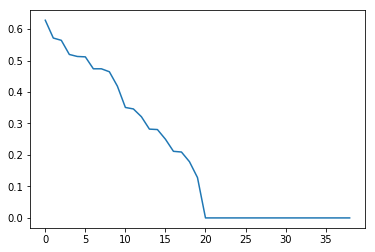

In [23]:
from matplotlib import pyplot as plt
plt.plot([rule[1] for rule in sorted_confidence])